In [ ]:
%cd "/content/drive/MyDrive/DEPI_TASKS/"

/content/drive/MyDrive/DEPI_TASKS


# **#libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# read **dataset**

In [ ]:
dataset=pd.read_excel("/content/drive/MyDrive/DEPI_TASKS/studentattrition/data/Student.xlsx")

In [ ]:
dataset.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


# `**data preprocessing::**`

In [ ]:
dataset.shape

(3400, 56)

In [ ]:
dataset.dtypes

,0
STUDENT IDENTIFIER,int64
STDNT_AGE,int64
STDNT_GENDER,object
STDNT_BACKGROUND,object
IN_STATE_FLAG,object
INTERNATIONAL_STS,object
STDNT_MAJOR,object
STDNT_MINOR,object
STDNT_TEST_ENTRANCE1,float64
STDNT_TEST_ENTRANCE2,float64


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE1      1106 non-null   float64
 9   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 10  STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 11  FIRST_TERM                3400 non-null   int64  
 12  CORE_COURSE_NAME_1_F      3400 non-null   object 
 13  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 14  CORE_COU

In [ ]:
#check missing values
dataset.isnull().sum()

,0
STUDENT IDENTIFIER,0
STDNT_AGE,0
STDNT_GENDER,0
STDNT_BACKGROUND,0
IN_STATE_FLAG,0
INTERNATIONAL_STS,0
STDNT_MAJOR,0
STDNT_MINOR,0
STDNT_TEST_ENTRANCE1,2294
STDNT_TEST_ENTRANCE2,908


<Axes: >

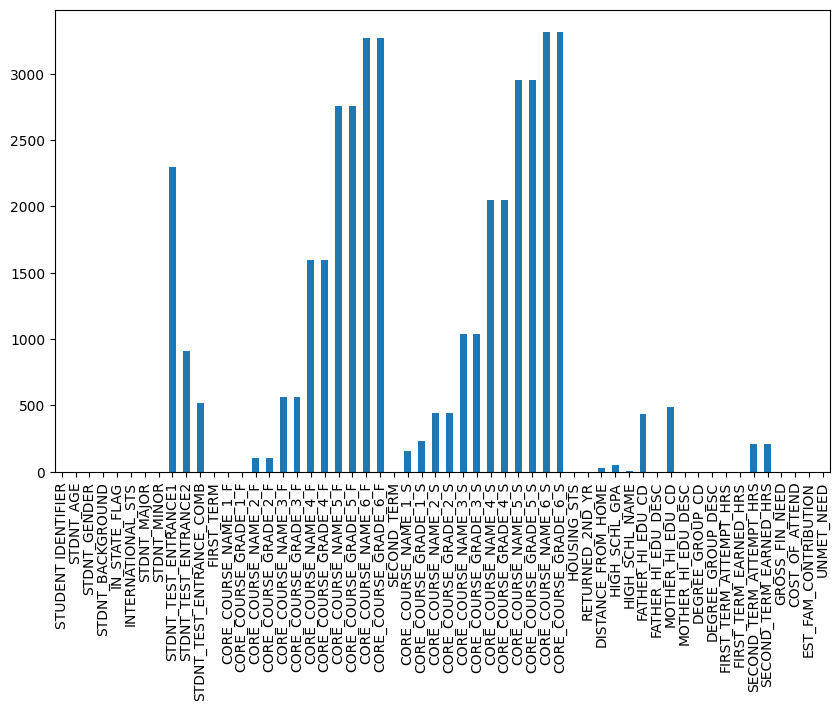

In [ ]:
plt.figure(figsize=(10,6))
dataset.isnull().sum().plot.bar()

In [ ]:
dataset.columns

Index(['STUDENT IDENTIFIER', 'STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND',
       'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR',
       'STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2',
       'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'CORE_COURSE_NAME_1_F',
       'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
       'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_4_F',
       'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_NAME_5_F',
       'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_NAME_6_F',
       'CORE_COURSE_GRADE_6_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_NAME_3_S',
       'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_NAME_4_S',
       'CORE_COURSE_GRADE_4_S', 'CORE_COURSE_NAME_5_S',
       'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_NAME_6_S',
       'CORE_COURSE_GRADE_6_S', 'HOUSING_STS', 'RETURNED_2ND_YR',
       'DISTANCE_FROM_

In [ ]:
dataset.drop(['STUDENT IDENTIFIER','CORE_COURSE_NAME_4_F','CORE_COURSE_GRADE_4_F','CORE_COURSE_NAME_5_F',
            'CORE_COURSE_GRADE_5_F','CORE_COURSE_NAME_6_F','CORE_COURSE_GRADE_6_F',
            'CORE_COURSE_NAME_4_S','CORE_COURSE_GRADE_4_S','CORE_COURSE_GRADE_5_S',
            'CORE_COURSE_NAME_5_S','CORE_COURSE_GRADE_6_S','CORE_COURSE_NAME_6_S',
            'CORE_COURSE_GRADE_3_F','CORE_COURSE_NAME_3_S',
            'CORE_COURSE_GRADE_3_S','CORE_COURSE_NAME_4_F',
            'CORE_COURSE_GRADE_4_F','CORE_COURSE_NAME_4_S',
            'CORE_COURSE_GRADE_4_S','CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F',
            'CORE_COURSE_NAME_2_S','CORE_COURSE_NAME_1_S','HIGH_SCHL_NAME',
              'CORE_COURSE_NAME_3_F','FATHER_HI_EDU_CD',
             'MOTHER_HI_EDU_CD',],axis=1,inplace=True)

In [ ]:
dataset.shape

(3400, 32)

In [ ]:
#find categorical feature
categorical=[]
for column in dataset:
  if dataset[column].dtype=='O':
      categorical.append(column)
print(categorical)
print("="*120)
print(len(categorical))

['STDNT_GENDER', 'STDNT_BACKGROUND', 'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR', 'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_GRADE_2_S', 'HOUSING_STS', 'FATHER_HI_EDU_DESC', 'MOTHER_HI_EDU_DESC', 'DEGREE_GROUP_CD', 'DEGREE_GROUP_DESC']
15


In [ ]:
# impute missing categorical variables with most frequent value
for column in categorical:
  dataset[column].fillna(dataset[column].mode()[0],inplace=True)

In [ ]:
dataset[categorical].isnull().sum()

,0
STDNT_GENDER,0
STDNT_BACKGROUND,0
IN_STATE_FLAG,0
INTERNATIONAL_STS,0
STDNT_MAJOR,0
STDNT_MINOR,0
CORE_COURSE_GRADE_1_F,0
CORE_COURSE_GRADE_2_F,0
CORE_COURSE_GRADE_1_S,0
CORE_COURSE_GRADE_2_S,0


In [ ]:
#find numerical feature
numerical=[]
for column in dataset:
  if dataset[column].dtype !='O':
      numerical.append(column)
print(numerical)
print("="*120)
print(len(numerical))

['STDNT_AGE', 'STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2', 'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'SECOND_TERM', 'RETURNED_2ND_YR', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA', 'FIRST_TERM_ATTEMPT_HRS', 'FIRST_TERM_EARNED_HRS', 'SECOND_TERM_ATTEMPT_HRS', 'SECOND_TERM_EARNED_HRS', 'GROSS_FIN_NEED', 'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION', 'UNMET_NEED']
17


In [ ]:
# impute missing numerical variables with median
for col in numerical:
    median_value = dataset[col].median()
    dataset[col].fillna(median_value, inplace=True)


In [ ]:
dataset[numerical].isnull().sum()

,0
STDNT_AGE,0
STDNT_TEST_ENTRANCE1,0
STDNT_TEST_ENTRANCE2,0
STDNT_TEST_ENTRANCE_COMB,0
FIRST_TERM,0
SECOND_TERM,0
RETURNED_2ND_YR,0
DISTANCE_FROM_HOME,0
HIGH_SCHL_GPA,0
FIRST_TERM_ATTEMPT_HRS,0


<Axes: >

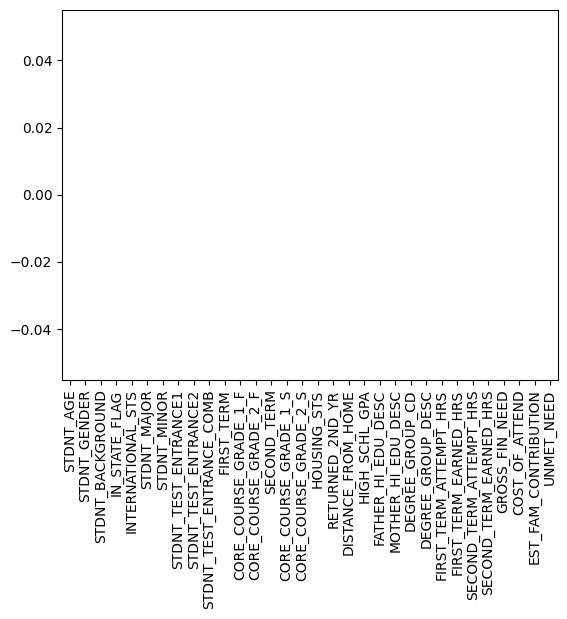

In [ ]:
dataset.isnull().sum().plot.bar()

In [ ]:
#encode categorical data
for col in categorical:
    print(col,"----->", dataset[col].unique())

STDNT_GENDER -----> ['F' 'M']
STDNT_BACKGROUND -----> ['BGD 1' 'BGD 3' 'BGD 6' 'BGD 4' 'BGD 8' 'BGD 2' 'BGD 7' 'BGD 5']
IN_STATE_FLAG -----> ['Y' 'N']
INTERNATIONAL_STS -----> ['N' 'Y']
STDNT_MAJOR -----> ['Undeclared' 'Mathematics' 'Art' 'Political Science' 'Biology'
 'Accounting' 'Criminal Justice' 'Psychology' 'Theatre Arts' 'Nursing'
 'Pre-Nursing' 'Chemistry' 'Pre-Engineering/RETP'
 'Early Childhood Education' 'Music Performance'
 'English Language/Literature' 'Joint Enrollment - Accel'
 'History and Secondary Ed' 'History' 'Engineering Studies'
 'Computer Science - Systems' 'Pre-Business' 'Management'
 'Theatre Education' 'Marketing' 'Communication' 'Music Education'
 'French with Teacher Cert' 'English and Secondary Ed' 'Exercise Science'
 'General Business' 'Mathematics and Secondary Ed' 'Finance' 'French'
 'Health Science' 'Spec Ed: Gen. Curr. - Reading' 'Music'
 'Middle Grades Education' 'Geology' 'Management Information Systems'
 'Art Education' 'Applied Computer Science' 'I

In [ ]:
# checking for duplicate rows
print("duplicate rows = " ,dataset.duplicated().sum())

duplicate rows =  0


In [ ]:
dataset=pd.get_dummies(dataset,drop_first=True,dtype=int)

In [ ]:
dataset.head()

,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FIRST_TERM_ATTEMPT_HRS,...,FATHER_HI_EDU_DESC_No Information,FATHER_HI_EDU_DESC_Other/Unknown,MOTHER_HI_EDU_DESC_High School,MOTHER_HI_EDU_DESC_Middle School/Junior High,MOTHER_HI_EDU_DESC_No Information,MOTHER_HI_EDU_DESC_Other/Unknown,DEGREE_GROUP_CD_B,DEGREE_GROUP_CD_V,DEGREE_GROUP_DESC_Bachelors,DEGREE_GROUP_DESC_Career Associate
0,18,20.0,1150.0,1150.0,200708,200802,0,150.0,4.00,16,...,1,0,0,0,1,0,1,0,1,0
1,19,26.0,990.0,1190.0,200808,200902,1,69.0,2.89,18,...,0,0,0,0,0,0,1,0,1,0
2,18,20.0,1020.0,1030.0,201008,201102,1,150.0,3.39,15,...,0,0,0,0,0,1,1,0,1,0
3,18,20.0,1210.0,1220.0,200708,200802,1,150.0,2.93,13,...,0,0,0,0,0,0,1,0,1,0
4,18,20.0,1200.0,1190.0,200808,200902,1,69.0,3.86,12,...,0,0,1,0,0,0,1,0,1,0


In [ ]:
print(dataset['RETURNED_2ND_YR'])

0       0
1       1
2       1
3       1
4       1
       ..
3395    0
3396    0
3397    0
3398    1
3399    0
Name: RETURNED_2ND_YR, Length: 3400, dtype: int64


In [ ]:
dataset.dtypes

,0
STDNT_AGE,int64
STDNT_TEST_ENTRANCE1,float64
STDNT_TEST_ENTRANCE2,float64
STDNT_TEST_ENTRANCE_COMB,float64
FIRST_TERM,int64
...,...
MOTHER_HI_EDU_DESC_Other/Unknown,int64
DEGREE_GROUP_CD_B,int64
DEGREE_GROUP_CD_V,int64
DEGREE_GROUP_DESC_Bachelors,int64


In [ ]:
dataset['FIRST_TERM'].unique()

array([200708, 200808, 201008, 200508, 200608, 200908])

In [ ]:
dataset['FIRST_TERM'] = pd.to_datetime(dataset['FIRST_TERM'], format='%Y%m')
dataset['FIRST_TERM'] = dataset['FIRST_TERM'].dt.year
dataset['SECOND_TERM'] = pd.to_datetime(dataset['SECOND_TERM'], format='%Y%m')
dataset['SECOND_TERM'] = dataset['SECOND_TERM'].dt.year
print(dataset['FIRST_TERM'].unique())
print("="*60)
print(dataset['SECOND_TERM'].unique())


[2007 2008 2010 2005 2006 2009]
[2008 2009 2011 2006 2007 2010]


In [ ]:
# view summary statistics in numerical  variables

print(round(dataset[numerical].describe()),2)

       STDNT_AGE  STDNT_TEST_ENTRANCE1  STDNT_TEST_ENTRANCE2  \
count     3400.0                3400.0                3400.0   
mean        18.0                  20.0                 972.0   
std          1.0                   2.0                 179.0   
min         16.0                   8.0                 350.0   
25%         18.0                  20.0                 940.0   
50%         18.0                  20.0                 990.0   
75%         18.0                  20.0                1050.0   
max         26.0                  32.0                1490.0   

       STDNT_TEST_ENTRANCE_COMB  FIRST_TERM  SECOND_TERM  RETURNED_2ND_YR  \
count                    3400.0      3400.0       3400.0           3400.0   
mean                      997.0      2008.0       2009.0              1.0   
std                       144.0         2.0          2.0              0.0   
min                       530.0      2005.0       2006.0              0.0   
25%                       910.0      2

<Axes: ylabel='UNMET_NEED'>

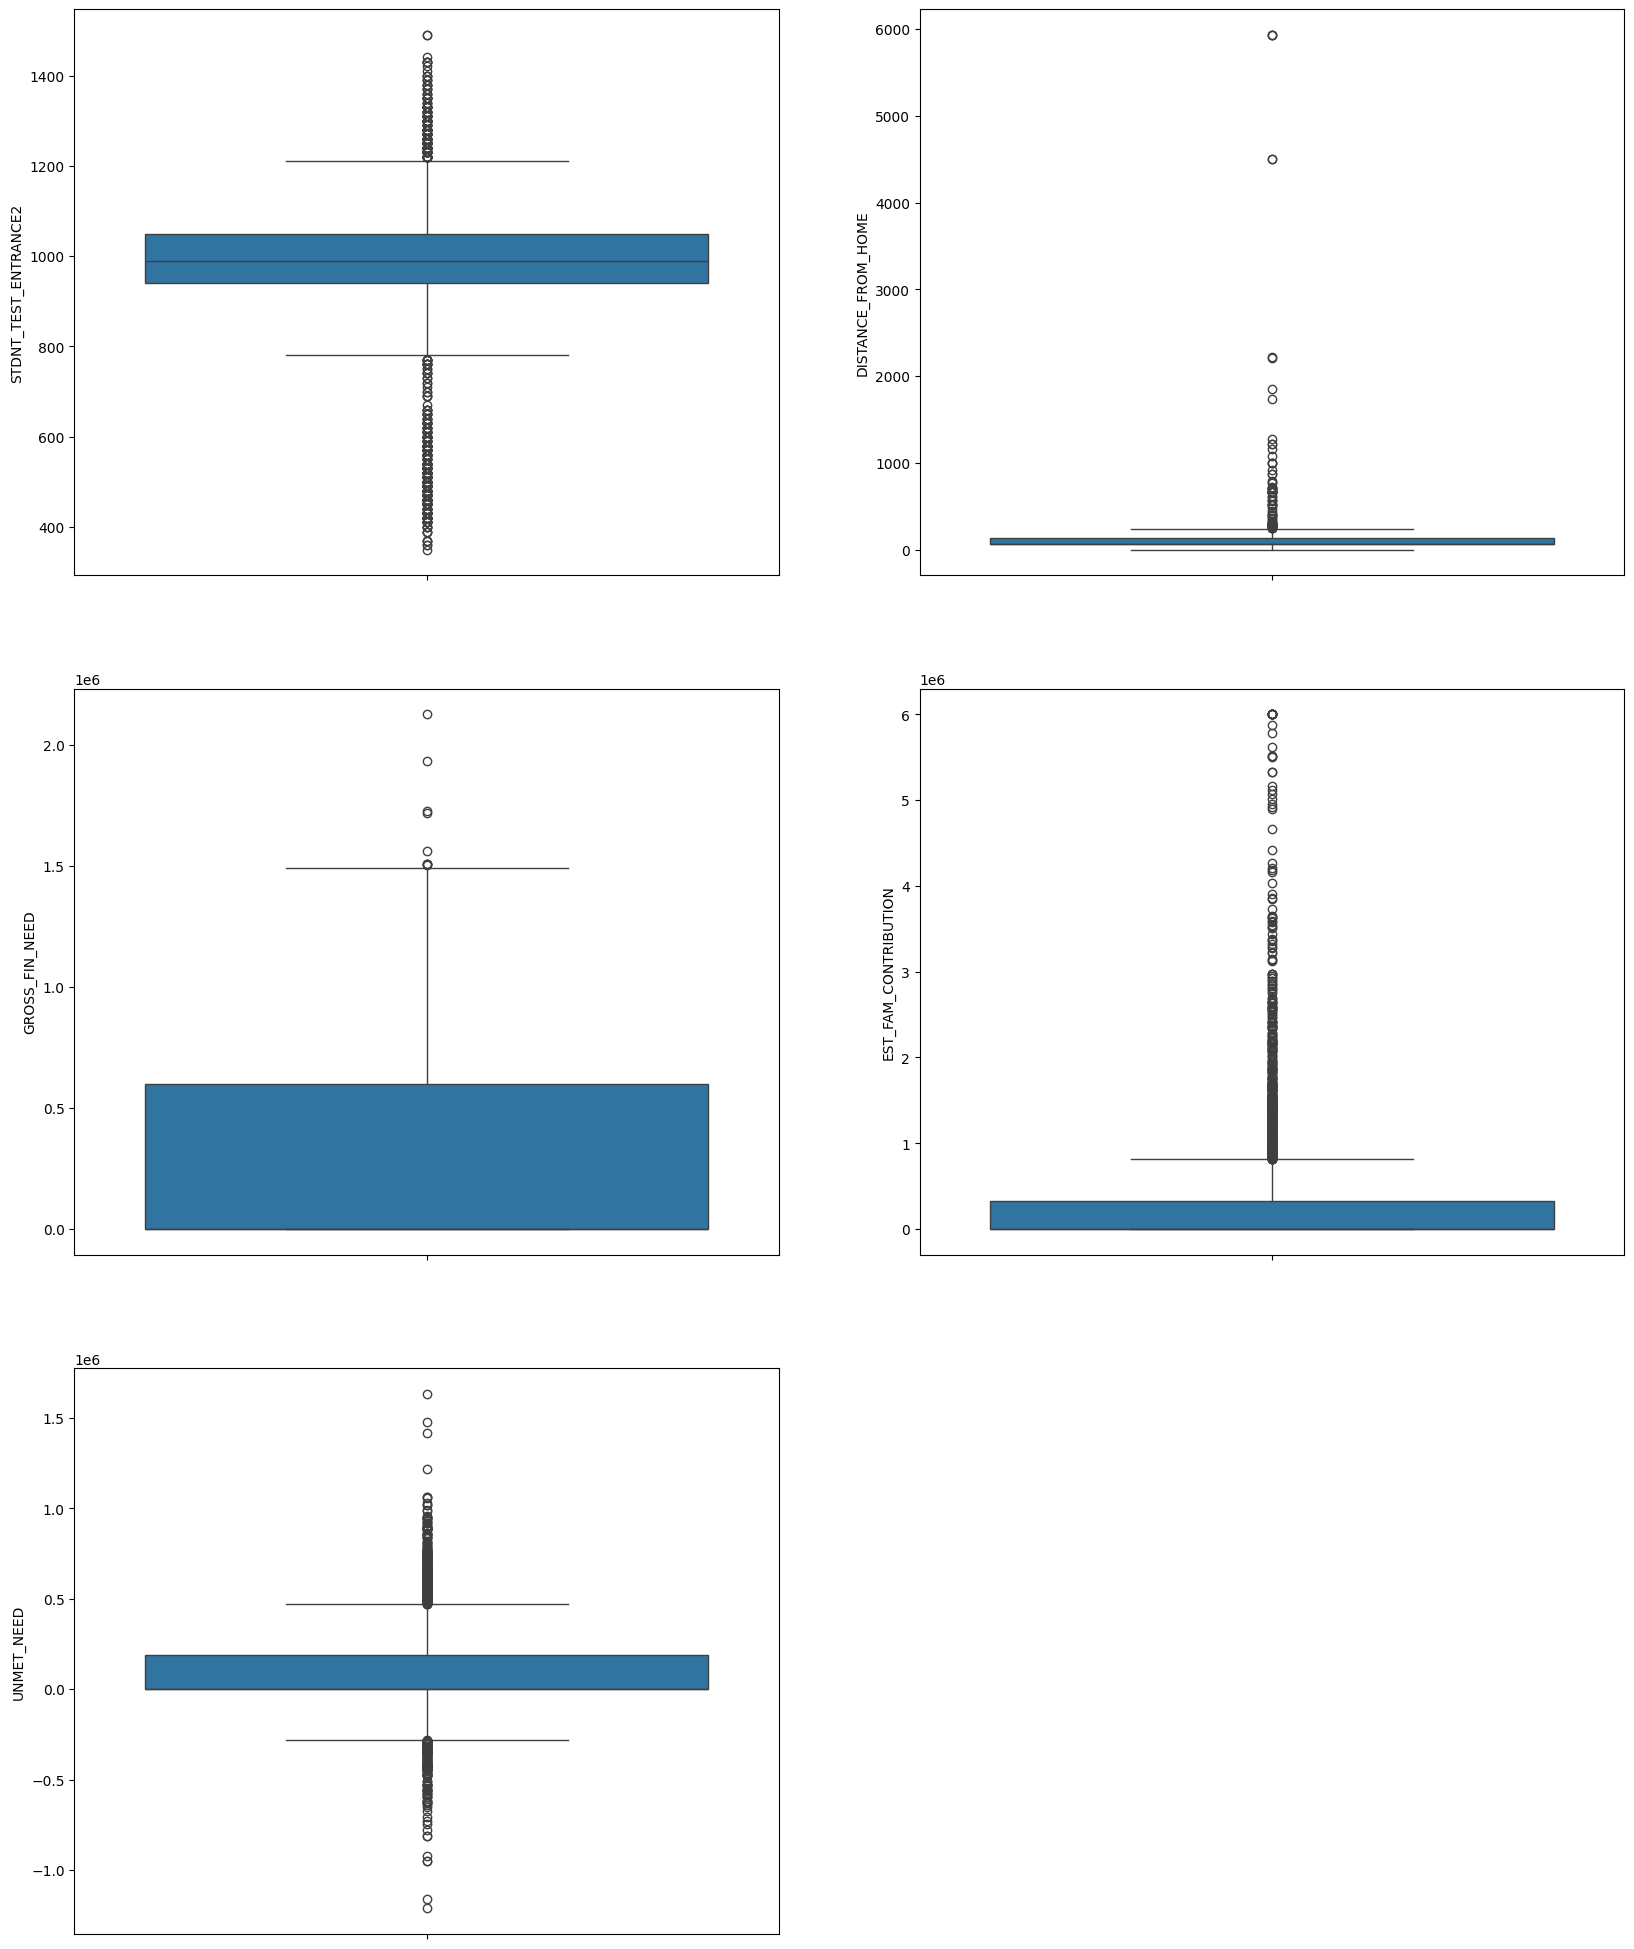

In [ ]:
#draw boxplot to visualize outlier
plt.figure(figsize=(20,25))
plt.subplot(3,2,1)
sns.boxplot(dataset['STDNT_TEST_ENTRANCE2'])
#----------------------------------------------
plt.subplot(3,2,2)
sns.boxplot(dataset['DISTANCE_FROM_HOME'])
#----------------------------------------------
plt.subplot(3,2,3)
sns.boxplot(dataset['GROSS_FIN_NEED'])
#----------------------------------------------
plt.subplot(3,2,4)
sns.boxplot(dataset['EST_FAM_CONTRIBUTION'])
#----------------------------------------------
plt.subplot(3,2,5)
sns.boxplot(dataset['UNMET_NEED'])




In [ ]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(dataset))

# Define a threshold
threshold = 3

# Identify outliers
outliers = (z_scores > threshold)

# Handle outliers by replacing them with the median of the column
datasetfinal= dataset.mask(outliers, dataset.median(), axis=1)

print("DataFrame after handling outliers using Z-score method:")
datasetfinal.describe()

DataFrame after handling outliers using Z-score method:


,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FIRST_TERM_ATTEMPT_HRS,...,FATHER_HI_EDU_DESC_No Information,FATHER_HI_EDU_DESC_Other/Unknown,MOTHER_HI_EDU_DESC_High School,MOTHER_HI_EDU_DESC_Middle School/Junior High,MOTHER_HI_EDU_DESC_No Information,MOTHER_HI_EDU_DESC_Other/Unknown,DEGREE_GROUP_CD_B,DEGREE_GROUP_CD_V,DEGREE_GROUP_DESC_Bachelors,DEGREE_GROUP_DESC_Career Associate
count,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,...,3400.000000,3400.0,3400.000000,3400.0,3400.000000,3400.0,3400.0,3400.0,3400.0,3400.0
mean,17.965000,19.998529,979.250000,1003.032353,2007.690000,2008.690000,0.787353,86.353235,3.203636,13.967941,...,0.127059,0.0,0.359706,0.0,0.143824,0.0,1.0,0.0,1.0,0.0
std,0.381553,1.249065,167.384381,131.073864,1.700013,1.700013,0.409240,77.414902,0.448420,1.506435,...,0.333088,0.0,0.479985,0.0,0.350962,0.0,0.0,0.0,0.0,0.0
min,17.000000,15.000000,440.000000,590.000000,2005.000000,2006.000000,0.000000,0.000000,1.870000,11.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,1.0,0.0
25%,18.000000,20.000000,940.000000,950.000000,2006.000000,2007.000000,1.000000,69.000000,2.873750,13.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,1.0,0.0
50%,18.000000,20.000000,990.000000,990.000000,2008.000000,2009.000000,1.000000,69.000000,3.200000,14.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,1.0,0.0
75%,18.000000,20.000000,1050.000000,1070.000000,2009.000000,2010.000000,1.000000,138.000000,3.550000,15.000000,...,0.000000,0.0,1.000000,0.0,0.000000,0.0,1.0,0.0,1.0,0.0
max,19.000000,25.000000,1490.000000,1420.000000,2010.000000,2011.000000,1.000000,786.000000,4.000000,18.000000,...,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.0,0.0,1.0,0.0


In [ ]:
datasetfinal.columns

Index(['STDNT_AGE', 'STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2',
       'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'SECOND_TERM',
       'RETURNED_2ND_YR', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA',
       'FIRST_TERM_ATTEMPT_HRS',
       ...
       'FATHER_HI_EDU_DESC_No Information', 'FATHER_HI_EDU_DESC_Other/Unknown',
       'MOTHER_HI_EDU_DESC_High School',
       'MOTHER_HI_EDU_DESC_Middle School/Junior High',
       'MOTHER_HI_EDU_DESC_No Information', 'MOTHER_HI_EDU_DESC_Other/Unknown',
       'DEGREE_GROUP_CD_B', 'DEGREE_GROUP_CD_V', 'DEGREE_GROUP_DESC_Bachelors',
       'DEGREE_GROUP_DESC_Career Associate'],
      dtype='object', length=153)

In [ ]:
# Check for negative values in dataset
negative_values = (datasetfinal < 0).any().any()

if negative_values:
    print("There are negative values in dataset")
else:
    print("There are no negative values in dataset")
columns_with_negatives = datasetfinal.columns[(datasetfinal < 0).any()]
print("Columns with negative values:", columns_with_negatives)


There are negative values in dataset
Columns with negative values: Index(['UNMET_NEED'], dtype='object')


In [ ]:
# Replace negative values in 'UNMET_NEED' with 0
datasetfinal['UNMET_NEED'] = datasetfinal['UNMET_NEED'].clip(lower=0)
negative_values_unmet_need = (datasetfinal['UNMET_NEED'] < 0).any()
print("Are there negative values in 'UNMET_NEED' after handling?", negative_values_unmet_need)


Are there negative values in 'UNMET_NEED' after handling? False


# **Splitting dataset into input and output**

In [ ]:
data_input = datasetfinal.drop(columns=['RETURNED_2ND_YR'])
data_output = datasetfinal['RETURNED_2ND_YR']

# `Splitting data into train, validation, and test`

In [ ]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(
    data_input, data_output, test_size=0.30, random_state=0
)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=0
)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('-------------------------')
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('-------------------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1666, 152)
y_train: (1666,)
-------------------------
X_val: (714, 152)
y_val: (714,)
-------------------------
X_test: (1020, 152)
y_test: (1020,)


In [ ]:
#Checking for imbalanced output
y_train.value_counts()

,count
RETURNED_2ND_YR,
1,1318
0,348


<Axes: xlabel='RETURNED_2ND_YR'>

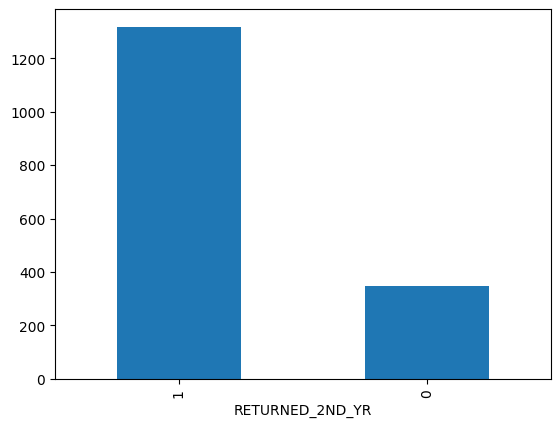

In [ ]:
y_train.value_counts().plot.bar()

Undersamping:

# Using undersampling to reduce the samples of class 0 so that Class 1 : Class 0 = **0.5**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.5, random_state=0)

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

y_train_rus.value_counts()

,count
RETURNED_2ND_YR,
1,696
0,348


Oversamping:

# Using oversampling to increase the samples of class 1 so that Class 1 : Class 0 = **1**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1.0, random_state=0)

X_train_balanced, y_train_balanced = ros.fit_resample(X_train_rus, y_train_rus)


y_train_balanced.value_counts()

,count
RETURNED_2ND_YR,
0,696
1,696


<Axes: xlabel='RETURNED_2ND_YR'>

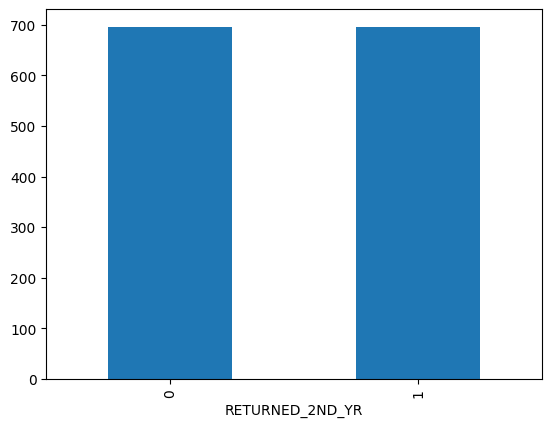

In [ ]:
y_train_balanced.value_counts().plot.bar()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_balanced)
X_train_scaled = scaler.transform(X_train_balanced)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train_scaled)

[[ 2.65108711 -0.00469932  0.06685075 ...  0.          0.
   0.        ]
 [ 0.05410382 -0.00469932 -3.05374773 ...  0.          0.
   0.        ]
 [ 0.05410382 -0.00469932  0.31649863 ...  0.          0.
   0.        ]
 ...
 [ 0.05410382 -0.00469932  0.50373454 ...  0.          0.
   0.        ]
 [ 2.65108711 -0.00469932 -0.05797319 ...  0.          0.
   0.        ]
 [ 0.05410382  0.81298195  0.06685075 ...  0.          0.
   0.        ]]


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu', input_shape=(X_train_scaled.shape[1],)))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate = 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))  # 0 - 1   >=0.5 ? 1 , 0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
history=classifier.fit(X_train_scaled, y_train_balanced,validation_split=0.2, batch_size=50, epochs=150)

Epoch 1/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5779 - loss: 0.6924 - val_accuracy: 0.0000e+00 - val_loss: 0.7065
Epoch 2/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6061 - loss: 0.6896 - val_accuracy: 0.0000e+00 - val_loss: 0.7239
Epoch 3/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6379 - loss: 0.6835 - val_accuracy: 0.0000e+00 - val_loss: 0.7554
Epoch 4/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6328 - loss: 0.6754 - val_accuracy: 0.0000e+00 - val_loss: 0.8082
Epoch 5/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6545 - loss: 0.6567 - val_accuracy: 0.0000e+00 - val_loss: 0.8795
Epoch 6/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6128 - loss: 0.6549 - val_accuracy: 0.0000e+00 - val_loss: 0.9471
Epoch 7/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6098 - loss: 0.6469 - val_accuracy: 0.0000e+00 - val_loss: 1.0022
Epoch 8/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6352 - loss: 0.61

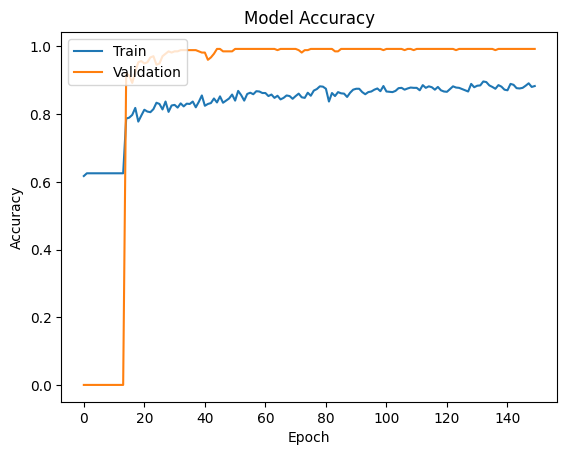

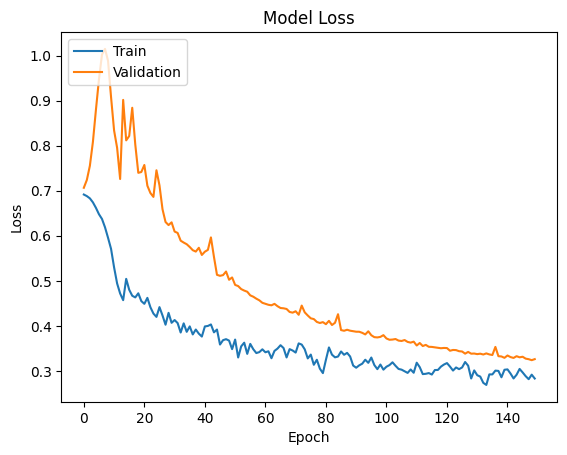

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy']) # Access history from the 'history' object
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss']) # Access history from the 'history' object
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_scaled)
y_pred = (y_pred >= 0.5)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
print(accuracy_score(y_test, y_pred))

0.6294117647058823


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[109, 101],
       [277, 533]])

# Helper function: Evaluate **Classifier**

In [ ]:
from sklearn.metrics import accuracy_score
'''
 Calculate and return training accuracy
 and validation accuracy of given classifier
 on given training and validation data
'''
def eval_classifier(clf,X_train_scaled, y_train_balanced , X_val_scaled, y_val):
 clf.fit(X_train_scaled, y_train_balanced )
 y_pred_train = clf.predict(X_train_scaled)
 y_pred_val = clf.predict(X_val_scaled)
 acc_train = accuracy_score(y_train_balanced , y_pred_train)
 acc_val = accuracy_score(y_val, y_pred_val)
 print(clf.__class__.__name__)
 print('acc train:', acc_train)
 print('acc val:', acc_val)
 print('----------------------------')
 return acc_train, acc_val

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=0)
logistic_clf = LogisticRegression(solver='liblinear', random_state=0)
svm_clf = SVC(random_state=0)
naive_bayes_clf = GaussianNB()
estimators = [
 ('tree', tree_clf),
 ('logistic', logistic_clf),
 ('svm', svm_clf),
 ('naive_bayes', naive_bayes_clf)
 ]

In [ ]:
results = {
 'model': [],
 'acc train': [],
 'acc val': []
}
for (name, clf) in estimators:
 acc_train, acc_val = eval_classifier(
 clf, X_train_scaled, y_train_balanced , X_val_scaled, y_val
 )
 results['model'].append(name)
 results['acc train'].append(acc_train)
 results['acc val'].append(acc_val)

DecisionTreeClassifier
acc train: 1.0
acc val: 0.6526610644257703
----------------------------
LogisticRegression
acc train: 0.6774425287356322
acc val: 0.6386554621848739
----------------------------
SVC
acc train: 0.8800287356321839
acc val: 0.6694677871148459
----------------------------
GaussianNB
acc train: 0.6357758620689655
acc val: 0.6260504201680672
----------------------------


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging_clf = BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=14,n_jobs=-1
)
acc_train_bag, acc_val_bag = eval_classifier(
 bagging_clf, X_train_scaled, y_train_balanced, X_val_scaled, y_val
)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier
acc train: 0.8074712643678161
acc val: 0.6078431372549019
----------------------------


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=180, max_depth=17, random_state=0)
acc_train_rf, acc_val_rf = eval_classifier(
 rf_clf, X_train_scaled,y_train_balanced, X_val_scaled, y_val
)

RandomForestClassifier
acc train: 1.0
acc val: 0.7843137254901961
----------------------------


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ex_clf = ExtraTreesClassifier(n_estimators=250, max_depth=20, random_state=0)
acc_train_ex, acc_val_ex = eval_classifier(
 ex_clf, X_train_scaled, y_train_balanced, X_val_scaled, y_val
)

ExtraTreesClassifier
acc train: 1.0
acc val: 0.7815126050420168
----------------------------


In [ ]:
final_results = {
 'model': [],
 'acc train': [],
 'acc val': []
}
final_results['model'] = results['model'] + ['bagging', 'random_forest', 'extra_trees']
final_results['acc train'] = results['acc train'] + [acc_train_bag, acc_train_rf, acc_train_ex]
final_results['acc val'] = results['acc val'] + [acc_val_bag, acc_val_rf, acc_val_ex]


In [ ]:
final_results_df = pd.DataFrame(final_results)
final_results_df.sort_values(by='acc val', ascending=False, ignore_index=True, inplace=True)
final_results_df


,model,acc train,acc val
0,random_forest,1.000000,0.784314
1,extra_trees,1.000000,0.781513
2,svm,0.880029,0.669468
3,tree,1.000000,0.652661
4,logistic,0.677443,0.638655
5,naive_bayes,0.635776,0.626050
6,bagging,0.807471,0.607843


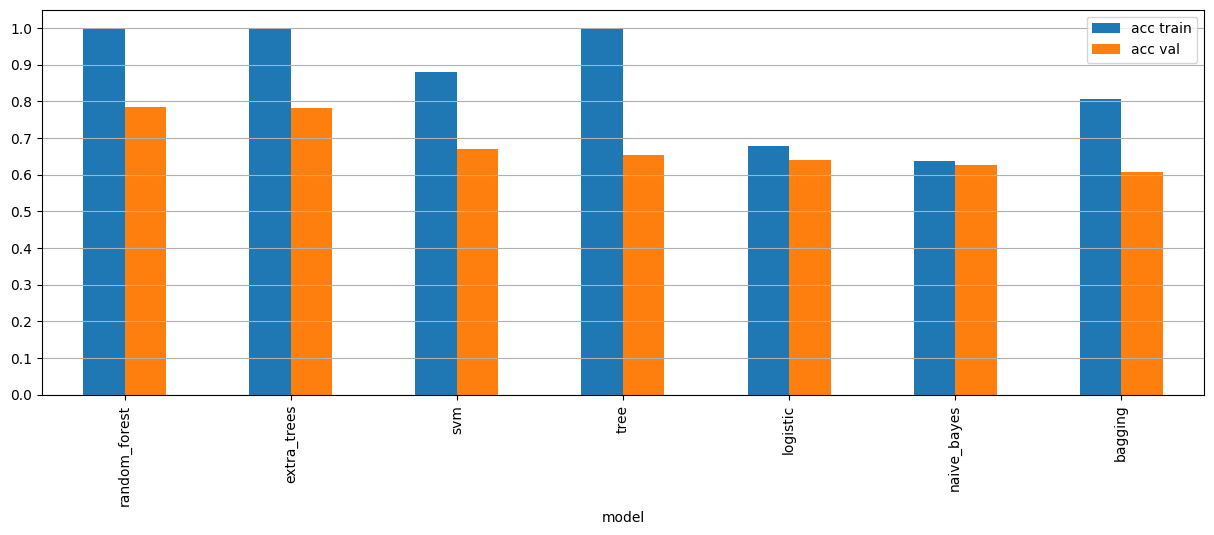

In [ ]:
%matplotlib inline
final_results_df.plot.bar(x='model', y=['acc train', 'acc val'], figsize=(15,5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

In [ ]:
model_best=random_forest=RandomForestClassifier()

model_best.fit(X_train_scaled, y_train_balanced)

RandomForestClassifier()

In [ ]:
y_pred_test =model_best.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_test))

0.7666666666666667


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[ 74, 136],
       [102, 708]])

In [ ]:

from sklearn.model_selection import GridSearchCV

# Decision Tree
param_grid_search_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search_tree = GridSearchCV(tree_clf, param_grid_search_tree, cv=5)
grid_search_tree.fit(X_train_scaled, y_train_balanced)
print("Best parameters for Decision Tree:", grid_search_tree.best_params_)

# Logistic Regression
param_grid_search_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}
grid_search_logistic = GridSearchCV(logistic_clf, param_grid_search_logistic, cv=5)
grid_search_logistic.fit(X_train_scaled, y_train_balanced)
print("Best parameters for Logistic Regression:", grid_search_logistic.best_params_)

# SVM
param_grid_search_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
grid_search_svm = GridSearchCV(svm_clf, param_grid_search_svm, cv=5)
grid_search_svm.fit(X_train_scaled, y_train_balanced)
print("Best parameters for SVM:", grid_search_svm.best_params_)

# Bagging Classifier
param_grid_search_bagging = {
    'n_estimators': [10, 50, 100],
    'base_estimator__n_neighbors': [3, 5, 7]
}
grid_search_bagging = GridSearchCV(bagging_clf, param_grid_search_bagging, cv=5)
grid_search_bagging.fit(X_train_scaled, y_train_balanced)
print("Best parameters for Bagging Classifier:", grid_search_bagging.best_params_)

# Random Forest
param_grid_search_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(rf_clf, param_grid_search_rf, cv=5)
grid_search_rf.fit(X_train_scaled, y_train_balanced)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Extra Trees
param_grid_search_ex = {
    'n_estimators': [100, 200, 350],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_ex = GridSearchCV(ex_clf, param_grid_search_ex, cv=5)
grid_search_ex.fit(X_train_scaled, y_train_balanced)
print("Best parameters for Extra Trees:", grid_search_ex.best_params_)


Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2}
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best parameters for Bagging Classifier: {'base_estimator__n_neighbors': 3, 'n_estimators': 10}
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best parameters for Extra Trees: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 350}


In [ ]:
#decision tree
best_decision_tree=grid_search_tree.best_estimator_

y_pred = best_decision_tree.predict(X_test_scaled)

# accuracy score
decision_clf_acc = accuracy_score(y_test, y_pred)
print(decision_clf_acc)


0.6696078431372549


In [ ]:
#logistic regression
best_logistic_regression=grid_search_logistic.best_estimator_

y_pred = best_logistic_regression.predict(X_test_scaled)

# accuracy score
logistic_clf_acc = accuracy_score(y_test, y_pred)
print(logistic_clf_acc)

0.6166666666666667


In [ ]:
#svm
best_svm=grid_search_svm.best_estimator_

y_pred = best_svm.predict(X_test_scaled)

# accuracy score
svm_clf_acc = accuracy_score(y_test, y_pred)
print(svm_clf_acc)

0.6862745098039216


In [ ]:
#bagging
best_bagging=grid_search_bagging.best_estimator_
y_pred=best_bagging.predict(X_test_scaled)
#accuracy_score
bagging_clf_acc=accuracy_score(y_test,y_pred)
print(bagging_clf_acc)

0.6029411764705882


In [ ]:
#random_forest
best_rand_forest=grid_search_rf.best_estimator_

y_pred = best_rand_forest.predict(X_test_scaled)

# accuracy score
ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.7862745098039216


In [ ]:
#extra tree
best_extra_tree=grid_search_ex.best_estimator_

y_pred = best_extra_tree.predict(X_test_scaled)

# accuracy score
ex_clf_acc = accuracy_score(y_test, y_pred)
print(ex_clf_acc)
#

0.7823529411764706
